In [78]:
import pandas as pd
import duckdb



In [79]:
emissoes_gases = pd.read_excel('1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx', sheet_name = 'GEE Estados')
populacao_estados  = pd.read_excel('POP2022_Municipios.xls', header = 1, skipfooter=34)
populacao_estados


c:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed



,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
0,RO,11,15,Alta Floresta D'Oeste,21558
1,RO,11,23,Ariquemes,100896
2,RO,11,31,Cabixi,5107
3,RO,11,49,Cacoal,92202
4,RO,11,56,Cerejeiras,15237
...,...,...,...,...,...
5565,GO,52,22005,Vianópolis,14046
5566,GO,52,22054,Vicentinópolis,8776
5567,GO,52,22203,Vila Boa,3686
5568,GO,52,22302,Vila Propício,5646


In [80]:
populacao_estados.loc[(populacao_estados['UF'] == 'AL') & (populacao_estados['NOME DO MUNICÍPIO'] == 'Anadia')]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
1651,AL,27,201,Anadia,13960


In [81]:
populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(', na = False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
16,RO,11,205,Porto Velho,461.748(1)
74,AM,13,29,Alvarães,15.916(2)
81,AM,13,409,Barcelos,18.399(3)
83,AM,13,607,Benjamin Constant,37.436(4)
87,AM,13,805,Borba,33.209(5)
88,AM,13,839,Caapiranga,13.851(6)
97,AM,13,1605,Fonte Boa,27.692(7)
98,AM,13,1654,Guajará,13.809(8)
99,AM,13,1704,Humaitá,59.504(9)
103,AM,13,1951,Itamarati,10.783(10)


In [82]:
populacao_estados = populacao_estados.assign(populacao_estados_sem_parenteses = populacao_estados['POPULAÇÃO'].replace('\(\d{1,2}\)','', regex= True),
                                             populacao = lambda x : x.loc[:,'populacao_estados_sem_parenteses'].replace('\.','',regex = True))

In [83]:
populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(', na = False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO,populacao_estados_sem_parenteses,populacao
16,RO,11,205,Porto Velho,461.748(1),461.748,461748
74,AM,13,29,Alvarães,15.916(2),15.916,15916
81,AM,13,409,Barcelos,18.399(3),18.399,18399
83,AM,13,607,Benjamin Constant,37.436(4),37.436,37436
87,AM,13,805,Borba,33.209(5),33.209,33209
88,AM,13,839,Caapiranga,13.851(6),13.851,13851
97,AM,13,1605,Fonte Boa,27.692(7),27.692,27692
98,AM,13,1654,Guajará,13.809(8),13.809,13809
99,AM,13,1704,Humaitá,59.504(9),59.504,59504
103,AM,13,1951,Itamarati,10.783(10),10.783,10783


In [84]:
populacao_estados = populacao_estados.astype({'populacao':'int64'})

In [85]:
populacao_estados = populacao_estados.groupby('UF')[['populacao']].sum(numeric_only= True).reset_index()

In [86]:
populacao_estados.rename(columns={'populacao': 'POPULAÇÃO'}, inplace = True)
populacao_estados


,UF,POPULAÇÃO
0,AC,829780
1,AL,3125254
2,AM,3952262
3,AP,774268
4,BA,14659023
5,CE,8936431
6,DF,2923369
7,ES,3975100
8,GO,6950976
9,MA,6800605


In [87]:
colunas_info = list(emissoes_gases.loc[:,'Nível 1 - Setor':'Produto'].columns)
colunas_emissao = list(emissoes_gases.loc[:,1970:2021].columns)
emissoes_por_ano = emissoes_gases.melt(id_vars = colunas_info, value_vars = colunas_emissao, var_name = 'Ano' , value_name = 'Emissão')
emissao_estados = emissoes_por_ano[emissoes_por_ano['Ano'] == 2021].groupby('Estado').sum(numeric_only= True).reset_index()
emissao_estados

,Estado,Emissão
0,AC,1.647780e+08
1,AL,6.397182e+07
2,AM,-3.536316e+08
3,AP,-1.464334e+08
4,BA,3.005179e+08
5,BR,0.000000e+00
6,CE,1.575001e+08
7,DF,5.303907e+07
8,ES,2.373097e+08
9,GO,3.138403e+08


In [88]:
dados_agrupados = pd.merge(emissao_estados, populacao_estados, left_on= 'Estado', right_on='UF')

In [89]:
dados_agrupados

,Estado,Emissão,UF,POPULAÇÃO
0,AC,1.647780e+08,AC,829780
1,AL,6.397182e+07,AL,3125254
2,AM,-3.536316e+08,AM,3952262
3,AP,-1.464334e+08,AP,774268
4,BA,3.005179e+08,BA,14659023
5,CE,1.575001e+08,CE,8936431
6,DF,5.303907e+07,DF,2923369
7,ES,2.373097e+08,ES,3975100
8,GO,3.138403e+08,GO,6950976
9,MA,5.491927e+08,MA,6800605


<AxesSubplot: xlabel='POPULAÇÃO', ylabel='Emissão'>

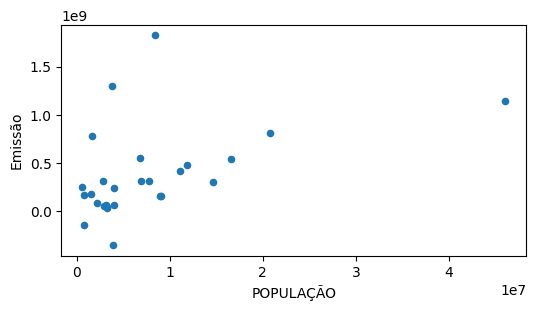

In [90]:
dados_agrupados.plot(x = 'POPULAÇÃO', y = 'Emissão', kind = 'scatter', figsize= (6,3))

In [91]:
import plotly.express as px

In [92]:
px.scatter(data_frame= dados_agrupados, x= 'POPULAÇÃO', y= 'Emissão', text = 'Estado', opacity= 0)

In [93]:
dados_agrupados = dados_agrupados.assign(emissao_per_capita = dados_agrupados['Emissão']/dados_agrupados['POPULAÇÃO']).sort_values('emissao_per_capita', ascending= False).reset_index()


In [94]:
#dados_agrupados = dados_agrupados.assign(emissao_per_capita = dados_agrupados['Emissão']/dados_agrupados['POPULAÇÃO']).sort_values('emissao_per_capita', ascending = False)
#dados_agrupados

In [95]:

dados_agrupados

,index,Estado,Emissão,UF,POPULAÇÃO,emissao_per_capita
0,20,RO,7.781357e+08,RO,1616379,481.406685
1,21,RR,2.553918e+08,RR,634805,402.315342
2,12,MT,1.299280e+09,MT,3784239,343.339916
3,13,PA,1.824634e+09,PA,8442962,216.113042
4,0,AC,1.647780e+08,AC,829780,198.580403
5,26,TO,1.803102e+08,TO,1584306,113.810197
6,11,MS,3.131680e+08,MS,2833742,110.513958
7,9,MA,5.491927e+08,MA,6800605,80.756444
8,7,ES,2.373097e+08,ES,3975100,59.699062
9,8,GO,3.138403e+08,GO,6950976,45.150532


In [96]:
dados_agrupados = dados_agrupados[~dados_agrupados['Estado'].isin(['AM','AP'])]

In [97]:
px.bar(data_frame = dados_agrupados, x = 'Estado', y = 'emissao_per_capita')

In [98]:
px.scatter(data_frame= dados_agrupados, x= 'POPULAÇÃO', y= 'Emissão', text = 'Estado', size = 'emissao_per_capita')

In [99]:
import re

texto = "Meus contatos: (11) 98765-4321 e (22) 12345-6789"

padrao = r"\((\d+)\) (\d+-\d+)"

resultado = re.findall(padrao, texto)

for telefone in resultado:
    print("Código de Área:", telefone[0])
    print("Número de Telefone:", telefone[1])
    print()

Padrão encontrado!


In [110]:
import plotly.graph_objects as go

frutas = ['Maçã', 'Banana', 'Laranja', 'Uva']
preferencias = [30, 25, 20, 25]  # Porcentagem de preferência

fig = go.Figure(data=[go.Pie(labels=frutas, values=preferencias)])

fig.update_layout(
    title='Preferência de Frutas',
    annotations=[dict(text='Total', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

fig.show()
